In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler = MinMaxScaler()

In [2]:
df = pd.read_csv('koi_data.csv')
df.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [3]:
#Change string to 1 and 0, in order to process the data
df['koi_disposition']= df['koi_disposition'].map({'CONFIRMED':1, 'FALSE POSITIVE':0})
df.pop('kepoi_name')
df.head()

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,1,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,0,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,1,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,0,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [4]:
#split data into target variable and predictors
X = df.loc[:, 'koi_period':'koi_dikco_msky']
y = df['koi_disposition']

In [5]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3901, 41), (1301, 41), (3901,), (1301,))

The below cell trains a naive bayes model and uses it to predict the classification with a k-fold cross validation, considering k=5.
Than compute the mean of the accuracy of all iterations, using it as a baseline for the next models.


In [6]:
fold = KFold(n_splits=5)
accuracy = []
for train, test in fold.split(df.values):
	X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
	X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
	y_train = df['koi_disposition'].values[train]
	y_test = df['koi_disposition'].values[test]


	#X_train = scaler.fit_transform(X_train)
	#X_test = scaler.fit_transform(X_test)
	modelnb = GaussianNB()
	modelnb.fit(X_train, y_train)

	y_pred = modelnb.predict(X_test)
	accuracy.append(accuracy_score(y_test, y_pred))

	print('accuracy: %s' % (accuracy_score(y_test, y_pred)))
	
print('mean : %s' %(np.mean(accuracy)))

accuracy: 0.8847262247838616
accuracy: 0.8645533141210374
accuracy: 0.7423076923076923
accuracy: 0.7778846153846154
accuracy: 0.7461538461538462
mean : 0.8031251385502106


Decision trees
Now, a decision tree will be implemented. First, the model varies the tree's max length between 1 and 10, and then one experiment with unlimited length is made.
Vary this parameter results in models with different capacities: bigger trees have more complexity than small trees, which is good for reducing the training error. However, it can lead the model to overfitting, which we don't want, since it will worsen the generalization, and the model will not be able to predict different parts of the data.

In [32]:
fold = KFold(n_splits=5)
dic = {'n':[], 'accuracy':[]}
for n in range(1,12):
	accuracy = []
	if (n==11): n=None
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]

		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		modeldt = DecisionTreeClassifier(max_depth=n)
		modeldt.fit(X_train, y_train)
		y_pred = modeldt.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	dic['n'].append(n)
	dic['accuracy'].append(np.mean(accuracy))
	print('n: %s, accuracy: %s' % (n, accuracy_score(y_test, y_pred)))

print('mean : %s' %(np.mean(accuracy)))

n: 1, accuracy: 0.41442307692307695
n: 2, accuracy: 0.8307692307692308
n: 3, accuracy: 0.9105769230769231
n: 4, accuracy: 0.9125
n: 5, accuracy: 0.9413461538461538
n: 6, accuracy: 0.9326923076923077
n: 7, accuracy: 0.9384615384615385
n: 8, accuracy: 0.925
n: 9, accuracy: 0.9259615384615385
n: 10, accuracy: 0.926923076923077
n: None, accuracy: 0.9307692307692308
mean : 0.9377179856646716


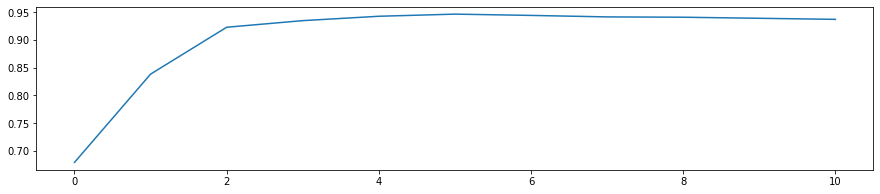

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,3])
plt.plot(dic['accuracy'])

In this case, it is possible to see that n = 5 resulted in the best generalization and the greatest accuracy, it had the best performance with all different test and training datasets.
It is possible to see that, at first, accuracy increases along with the accuracy, although it starts to decrease later, and that is the overfitting, even unlimited length has a worse accuracy than n=5.

Support Vector Machines
Below is implemented a SVM model with different kernels: linear, sigmoid, polynomial, and rbf.
Each kernel results in different representations of the data, making it possible to perfectly separate the data or not.

In [7]:
from sklearn import svm
fold = KFold(n_splits=5)
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
for i in kernels:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		modelsvm = svm.SVC(kernel=i)
		modelsvm.fit(X_train, y_train)
		y_pred = modelsvm.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	print('kernel: %s, accuracy: %s' % (i, accuracy_score(y_test, y_pred)))

kernel: linear, accuracy: 0.8913461538461539
kernel: sigmoid, accuracy: 0.45096153846153847
kernel: poly, accuracy: 0.9009615384615385
kernel: rbf, accuracy: 0.8625


Linear and polynomial kernels had very close results, while rbf was intermediary and sigmoid did not give a good representation.
It is possible to realise that polynomial kernel gives a better representation of the data.

K-Nearest Neighbors
This method classifies the data based on the nearest neighbors, and it is possible to alternate the number of nearest neighbors that the program will use.
In the below cell, a KNN algorithm is used, alternating from k=1 to k=15 and getting the accuracy score of each one.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
n = list(range(1, 16))
listt = []
fold = KFold(n_splits=5)
for i in n:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		model = KNeighborsClassifier(n_neighbors=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	listt.append(sum(accuracy)/len(accuracy))
	print('nl: %s, accuracy: %s' % (i, accuracy_score(y_test, y_pred)))




nl: 1, accuracy: 0.7461538461538462
nl: 2, accuracy: 0.8461538461538461
nl: 3, accuracy: 0.7634615384615384
nl: 4, accuracy: 0.8240384615384615
nl: 5, accuracy: 0.7557692307692307
nl: 6, accuracy: 0.7990384615384616
nl: 7, accuracy: 0.7490384615384615
nl: 8, accuracy: 0.7846153846153846
nl: 9, accuracy: 0.7423076923076923
nl: 10, accuracy: 0.7769230769230769
nl: 11, accuracy: 0.7413461538461539
nl: 12, accuracy: 0.7673076923076924
nl: 13, accuracy: 0.7365384615384616
nl: 14, accuracy: 0.7519230769230769
nl: 15, accuracy: 0.7307692307692307


As the model gets more complex, it is possible to notice  the overfitting, since the accuracy starts dropping after k=2. Even though it increases again in k=4,it's still worse than k=2, and the model gets more and more overfitted

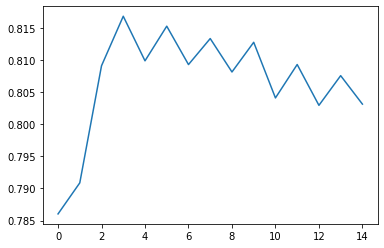

In [21]:
plt.plot(listt)

Random forest

Now, the number of trees used in the model can be modified, resulting in different values for the accuracy and increasing the complexity of the model as the number of trees is increased.

In [9]:
from sklearn.ensemble import RandomForestClassifier
n = list(range(1, 21))
listt = []
fold = KFold(n_splits=5)
for i in n:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		if (i==n[-1]):
			model = RandomForestClassifier(max_depth=None)
		else:
			model = RandomForestClassifier(max_depth=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	listt.append(sum(accuracy)/len(accuracy))
	print('n: %s, accuracy: %s' % (i, accuracy_score(y_test, y_pred)))




n: 1, accuracy: 0.7009615384615384
n: 2, accuracy: 0.8269230769230769
n: 3, accuracy: 0.8298076923076924
n: 4, accuracy: 0.8509615384615384
n: 5, accuracy: 0.8990384615384616
n: 6, accuracy: 0.9182692307692307
n: 7, accuracy: 0.948076923076923
n: 8, accuracy: 0.9605769230769231
n: 9, accuracy: 0.9605769230769231
n: 10, accuracy: 0.9634615384615385
n: 11, accuracy: 0.9673076923076923
n: 12, accuracy: 0.9682692307692308
n: 13, accuracy: 0.9673076923076923
n: 14, accuracy: 0.975
n: 15, accuracy: 0.9730769230769231
n: 16, accuracy: 0.9721153846153846
n: 17, accuracy: 0.9711538461538461
n: 18, accuracy: 0.9740384615384615
n: 19, accuracy: 0.9759615384615384
n: 20, accuracy: 0.9769230769230769


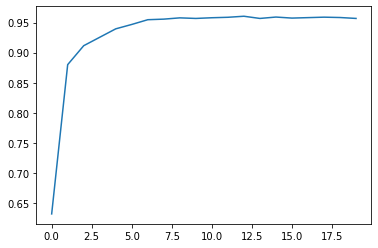

In [25]:
plt.plot(listt)

Random Forest was, by far, the best method until now, it returned a very high accuracy, greater than 97%. Also, it's possible to notice that it started overfitting after n=9, the accuracy didn't increased significantly.

Gradient Tree Boosting
In this method, it is possible to modify the number of iterations and, therefore, increase the complexity of the model.

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
n = list(range(1, 21))
listt = []
fold = KFold(n_splits=5)
for i in n:
	accuracy = []
	for train, test in fold.split(df.values):
		#print('train: %s, test: %s' % (df.values[train], df.values[test]))
		X_train = df.loc[:, 'koi_period':'koi_dikco_msky'].values[train]
		X_test = df.loc[:, 'koi_period':'koi_dikco_msky'].values[test]
		y_train = df['koi_disposition'].values[train]
		y_test = df['koi_disposition'].values[test]
		
		X_train = scaler.fit_transform(X_train)
		X_test = scaler.transform(X_test)
		model = GradientBoostingClassifier(n_estimators=i)
		model.fit(X_train, y_train)
		y_pred = model.predict(X_test)
		accuracy.append(accuracy_score(y_test, y_pred))
	listt.append(sum(accuracy)/len(accuracy))
	print('n: %s, accuracy: %s' % (i, accuracy_score(y_test, y_pred)))




n: 1, accuracy: 0.9105769230769231
n: 2, accuracy: 0.9
n: 3, accuracy: 0.9076923076923077
n: 4, accuracy: 0.9086538461538461
n: 5, accuracy: 0.8586538461538461
n: 6, accuracy: 0.9019230769230769
n: 7, accuracy: 0.9144230769230769
n: 8, accuracy: 0.9115384615384615
n: 9, accuracy: 0.9134615384615384
n: 10, accuracy: 0.9192307692307692
n: 11, accuracy: 0.9144230769230769
n: 12, accuracy: 0.9240384615384616
n: 13, accuracy: 0.948076923076923
n: 14, accuracy: 0.9317307692307693
n: 15, accuracy: 0.9451923076923077
n: 16, accuracy: 0.9451923076923077
n: 17, accuracy: 0.9442307692307692
n: 18, accuracy: 0.9528846153846153
n: 19, accuracy: 0.9557692307692308
n: 20, accuracy: 0.9586538461538462


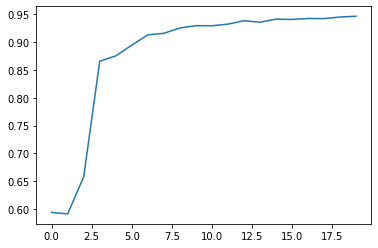

In [28]:
plt.plot(listt)

The model didn't properly overfit, but it's easy to observe that it stopped increasing significantly  after 13 iterations, and it also had very good results.

ROC Curve plot

In [24]:
from sklearn.metrics import roc_curve
X = df.loc[:, 'koi_period':'koi_dikco_msky']
y = df['koi_disposition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [25]:
modelnb = GaussianNB()
modelnb.fit(X_train, y_train)
nb= modelnb.predict(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modeldt = DecisionTreeClassifier(max_depth=5)
modeldt.fit(X_train, y_train)
dt = modeldt.predict(X_test)

modelsvm = svm.SVC(kernel='poly')
modelsvm.fit(X_train, y_train)
sv = modelsvm.predict(X_test)

modelknn = KNeighborsClassifier(n_neighbors=2)
modelknn.fit(X_train, y_train)
knn = modelknn.predict(X_test)

modelrf = RandomForestClassifier(max_depth=20)
modelrf.fit(X_train, y_train)
rf = modelrf.predict(X_test)

modelgb = GradientBoostingClassifier(n_estimators=20)
modelgb.fit(X_train, y_train)
gb = model.predict(X_test)



In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
y = np.mean(accuracy)

nb_auc = roc_auc_score(y_test, nb)
dt_auc = roc_auc_score(y_test, dt)
sv_auc = roc_auc_score(y_test, sv)
knn_auc = roc_auc_score(y_test, knn)
rf_auc = roc_auc_score(y_test, rf)
gb_auc = roc_auc_score(y_test, gb)

In [27]:
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb)

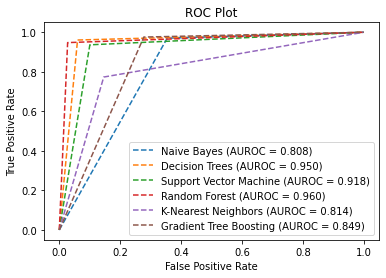

In [29]:
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Trees (AUROC = %0.3f)' % dt_auc)
plt.plot(sv_fpr, sv_tpr, linestyle='--', label='Support Vector Machine (AUROC = %0.3f)' % sv_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(gb_fpr, gb_tpr, linestyle='--', label='Gradient Tree Boosting (AUROC = %0.3f)' % gb_auc)



plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() # 
plt.show()

Precision-Recall Metric

In [32]:
from sklearn.metrics import precision_recall_curve

precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test, nb)
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, sv)
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn)
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, dt)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf)
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test, gb)


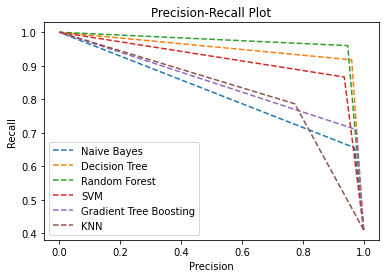

In [35]:
plt.plot(recall_nb, precision_nb, linestyle='--', label='Naive Bayes')
plt.plot(recall_dt, precision_dt, linestyle='--', label='Decision Tree')
plt.plot(recall_rf, precision_rf, linestyle='--', label='Random Forest')
plt.plot(recall_svm, precision_svm, linestyle='--', label='SVM')
plt.plot(recall_gb, precision_gb, linestyle='--', label='Gradient Tree Boosting')
plt.plot(recall_knn, precision_knn, linestyle='--', label='KNN')


plt.title('Precision-Recall Plot')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend() # 
plt.show()